In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from matplotlib import pyplot as plt
import scipy
import pandas as pd

  
# importing the style package
from matplotlib import style  
# using the style for the plot
plt.style.use('seaborn-v0_8-darkgrid')
floatfmt = '.2f'

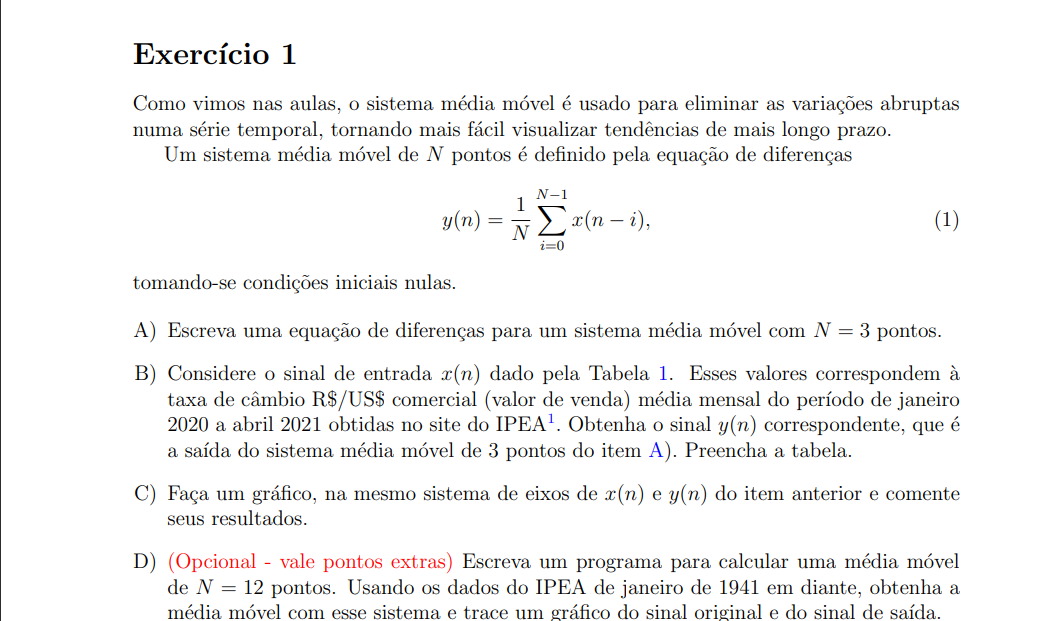

In [14]:
def moving_average(x_n, n):
    y_n = []
    v_n = []
    for i, x in enumerate(x_n):
        min_index = max(0, i-n)
        v = x_n[min_index:i]
        if len(v) < 3:
            v_n.append([i, [], x, np.nan])
            y_n.append(np.nan)
            continue
        ma = 1/len(v) * sum(v)
        v_n.append([i, v, x, ma])
        y_n.append(ma)
    return y_n, v_n

#### A)
$y(n) = 1/3*(x(n-1) + x(n-2) + x(n-3))$

#### B)

In [15]:
x_n = [4.15,4.34,4.88,5.33,5.64,5.20,5.28,5.46,5.40,5.63,5.42,5.15,5.36,5.42,5.65,5.56,]

In [16]:
y_n, v_n = moving_average(x_n, 3)
headers = ['i.', 'v', 'x(n)', 'y(n)']
print(tabulate(v_n, headers=headers, floatfmt=floatfmt))

  i.  v                     x(n)    y(n)
----  ------------------  ------  ------
   0  []                    4.15  nan
   1  []                    4.34  nan
   2  []                    4.88  nan
   3  [4.15, 4.34, 4.88]    5.33    4.46
   4  [4.34, 4.88, 5.33]    5.64    4.85
   5  [4.88, 5.33, 5.64]    5.20    5.28
   6  [5.33, 5.64, 5.2]     5.28    5.39
   7  [5.64, 5.2, 5.28]     5.46    5.37
   8  [5.2, 5.28, 5.46]     5.40    5.31
   9  [5.28, 5.46, 5.4]     5.63    5.38
  10  [5.46, 5.4, 5.63]     5.42    5.50
  11  [5.4, 5.63, 5.42]     5.15    5.48
  12  [5.63, 5.42, 5.15]    5.36    5.40
  13  [5.42, 5.15, 5.36]    5.42    5.31
  14  [5.15, 5.36, 5.42]    5.65    5.31
  15  [5.36, 5.42, 5.65]    5.56    5.48


#### C)

Através do gráfico, percebe-se a função de filtro passa-baixa do sistema média móvel, já que a linha dos pontos da média móvel são mais suaves que o sinal original 

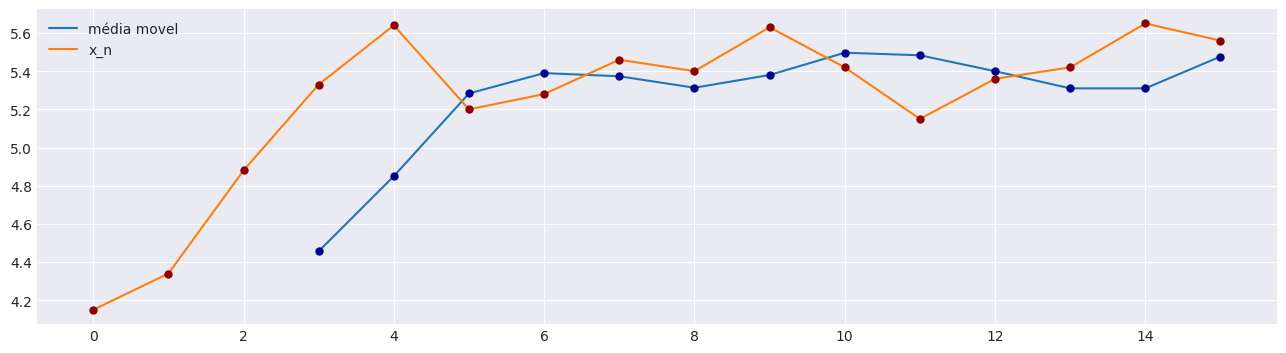

In [17]:
plt.figure(figsize=[16,9])
plt.subplot(211)
plt.plot(y_n, label='média movel')
plt.plot(x_n, label='x_n')
plt.scatter(range(len(x_n)), y_n, s=25, c='darkblue', zorder=3)
plt.scatter(range(len(x_n)), x_n, s=25, c='darkred', zorder=3)
plt.legend()
plt.show()

#### D)
Os dados foram salvos em um arquivo chamado 'ipea.csv', com as colunas date e value

Podemos ver que há uma quebra significativa no gráfico a partir de (aproximadamente) 1995, devido à mudança de moeda (Plano Real). É possível que haja outras quebras como essa ao longo do tempo, imperceptíveis pela escala do gráfico. Por isso, três gráficos são mostrados:
- t > 1995
- t < 1948
- 1960 < t < 1980

In [18]:
ipea = pd.read_csv('ipea.csv')
# converte o mês em proporção de 0-1
ipea['date'] = ipea['date'].apply(lambda x: int(x) + (x-int(x))*100/12)

## 1995 - ##


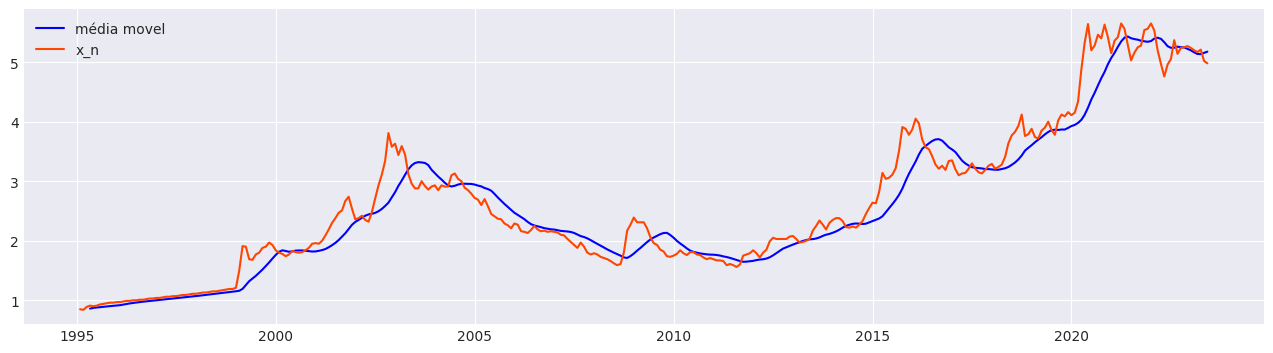

## - 1948 ##


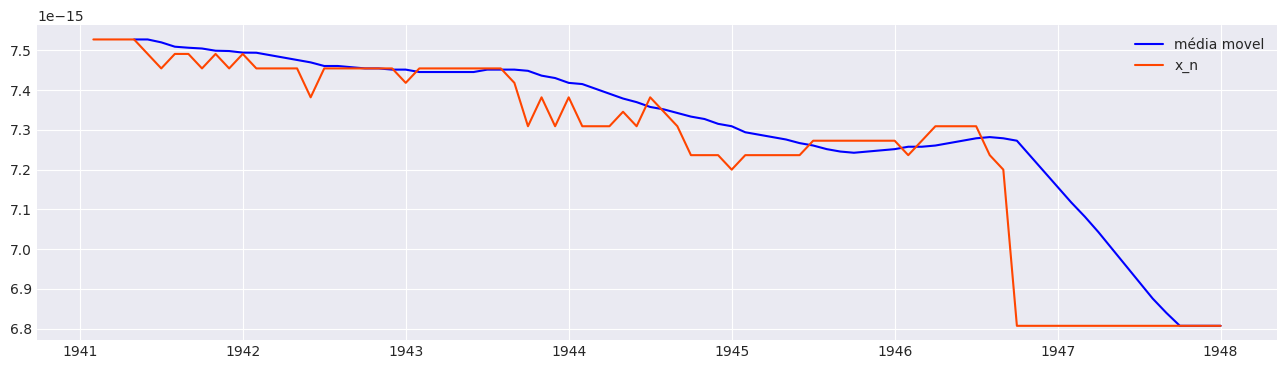

## 1960 - 1980 ##


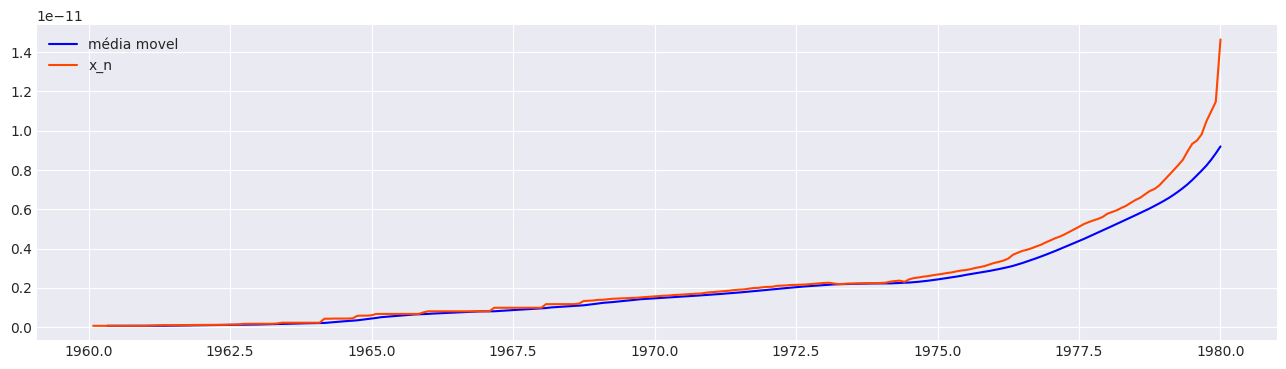

In [22]:
print('## 1995 - ##')
plt.figure(figsize=[16,9])
plt.subplot(211)
t = 1995
dates = ipea.date[ipea.date > t]
x_n = ipea.value[ipea.date > t].values
y_n, v_n = moving_average(x_n, 12)
plt.plot(dates, y_n, c='blue', label='média movel')
plt.plot(dates, x_n, c='orangered', label='x_n')
plt.legend()
plt.show()
plt.figure(figsize=[16,9])
plt.subplot(211)

print('## - 1948 ##')
t = 1948
dates = ipea.date[ipea.date < t]
x_n = ipea.value[ipea.date < t].values
y_n, v_n = moving_average(x_n, 12)

plt.plot(dates, y_n, c='blue', label='média movel')
plt.plot(dates, x_n, c='orangered', label='x_n')
plt.legend()
plt.show()

plt.figure(figsize=[16,9])
plt.subplot(211)

print('## 1960 - 1980 ##')
t1 = 1960
t2 = 1980
dates = ipea.date[(ipea.date >= t1) & (ipea.date <= t2)]
x_n = ipea.value[(ipea.date >= t1) & (ipea.date <= t2)].values
y_n, v_n = moving_average(x_n, 12)

plt.plot(dates, y_n, c='blue', label='média movel')
plt.plot(dates, x_n, c='orangered', label='x_n')
plt.legend()
plt.show()

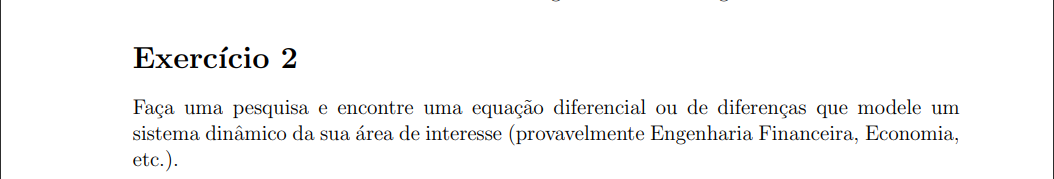
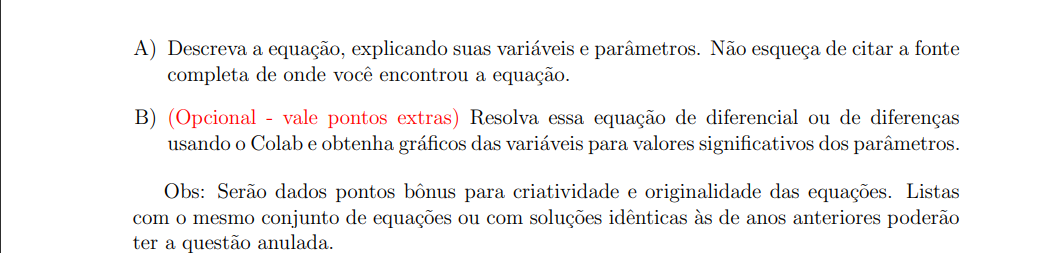

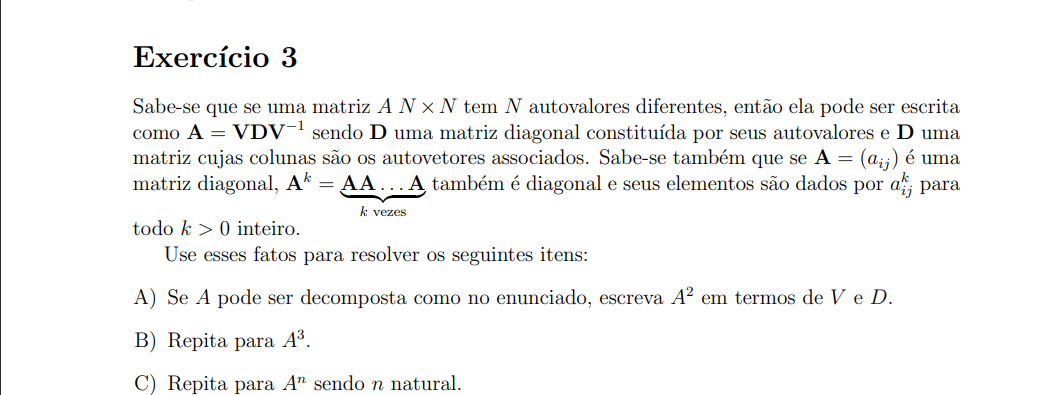

#### A)

$ A^2 = A*A = VD(V^{-1} * V)DV^{-1} $

$ A^2 = V(D*I_{n}*D)V^{-1} $

$ A^2 = VD^2V^{-1} $

#### B)

$ A^3 = A^2*A = VD^2(V^{-1} * V)DV^{-1} $

$ A^3 = V(D^2*I_{n}*D)V^{-1} $

$ A^3 = VD^3V^{-1} $

#### C)

$ A^n = A*A^{n-1}$

$ A^n = VDV^{-1} * (VDV^{-1}) * (VDV^{-1}) * (VDV^{-1}) ...$

$ A^n = VDV^{-1} * ((VD(V^{-1} * V)DV^{-1}) * (VDV^{-1}) ...$

$ A^n = VDV^{-1} * (VDIDV^{-1}) * (VDV^{-1}) ...$

$ A^n = VDV^{-1} * (VD^2V^{-1}) * (VDV^{-1}) ...$

$ A^n = VDV^{-1} * VD^{n-1}V^{-1}$

$ A^n = VD^nV^{-1} $

In [52]:
A = np.array([[2,0,0],
              [0,1,0],
              [0,0,3],])
A_5 = np.linalg.matrix_power(A,5)
evalues, evectors = np.linalg.eig(A)
A_5 ==  evectors * evalues**5 * np.linalg.inv(evectors)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

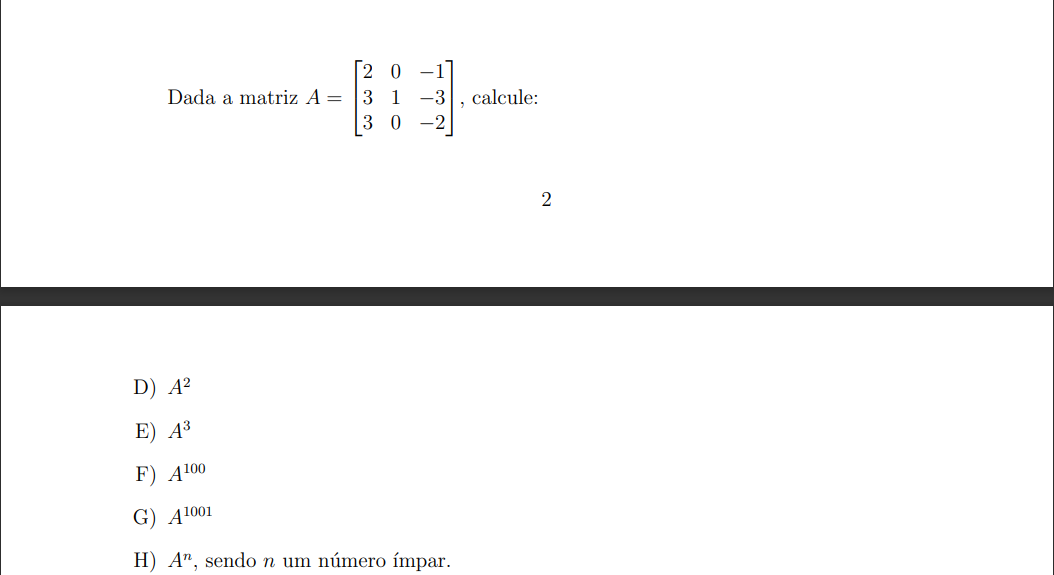

#### D)

In [82]:
A = np.array([[2,0,-1],
              [3,1,-3],
              [3,0,-2]])
print('A² = ')
print(np.linalg.matrix_power(A,4))

A² = 
[[1 0 0]
 [0 1 0]
 [0 0 1]]


Portanto
$A^2 = I_3 = VDV^{-1} \implies V=I_3 ; D = [1,1,1]$

E) $A^3 = A^2*A == A$

F) $A^{100} = (A^2)^{50} = I$

G) $A^{1001} = A^{1000}*A = (I)^{500}*A = A$

H) $A^{n} = A^{n-1}*A = (I)^{(n-1)/2}*A = A$

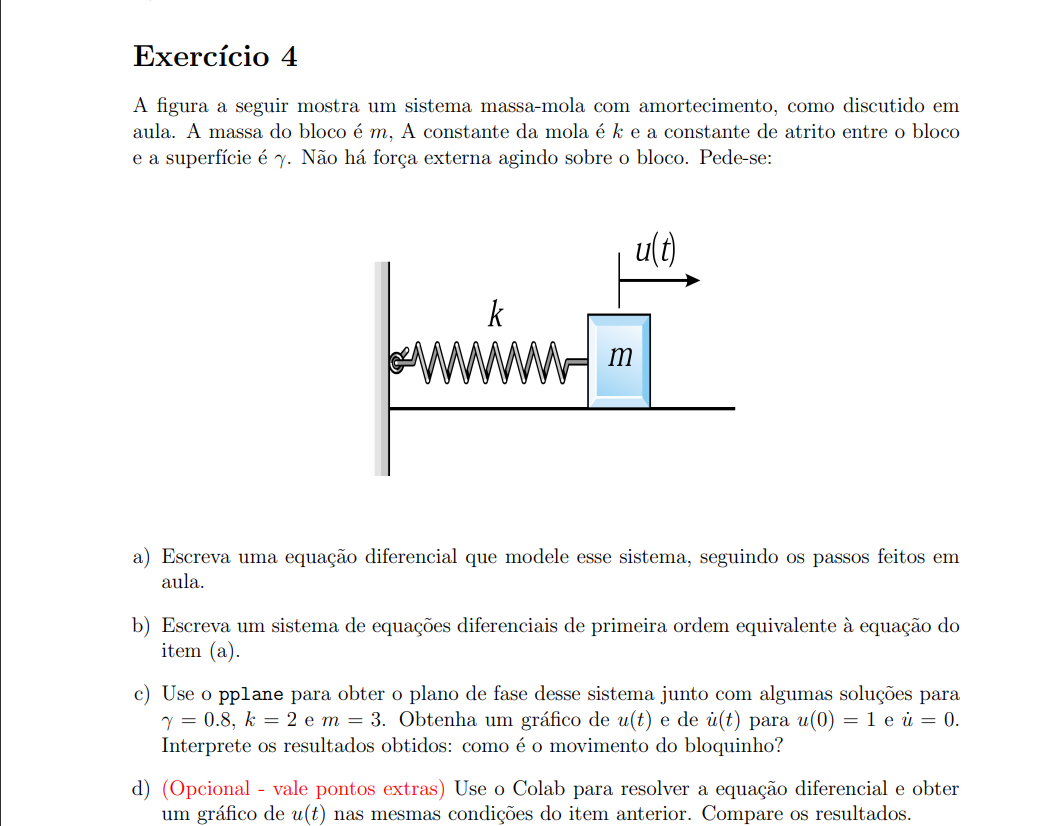